# Event Propensity - Check Score Distribution
* Ryan Kazmerik
* StellarAlgo Data Science
* Oct 15, 2022

In [54]:
import boto3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from shared_utilities import helpers
from data_sci_toolkit.aws_tools import permission_tools 

### Let's import some scores from SageMaker and have a look at the data:

In [55]:
session = permission_tools.get_aws_session("Explore-US-DataScienceAdmin")

Authorized as AROASSH5KEZ7FS7KUJUD3:rkazmerik@stellaralgo.com


In [56]:
S3_PATH = "s3://explore-us-curated-data-sci-event-propensity-us-east-1-yvf53s/date=2022-10-26/stamps/scores.csv"

In [57]:
s3 = session.client('s3')

scores = s3.get_object(Bucket=S3_PATH.split("/")[2], Key='/'.join(S3_PATH.split("/")[3:]))
df_scores = pd.read_csv(scores.get("Body"))

df_scores.shape

(516608, 13)

In [58]:
df_scores.head()

,daysout,dimcustomermasterid,distancetovenue,eventdate,events_purchased,frequency_opponent,frequency_eventday,frequency_eventtime,recent_openrate,recent_clickrate,sascore,scoredate,tenure
0,Day Of,1786684,NaN,2022-10-29,1,0.0,0.0,0.0294,NaN,NaN,25.82,2022-10-26,1950
1,1 to 3 Days Out,1786684,NaN,2022-10-29,1,0.0,0.0,0.0294,NaN,NaN,26.70,2022-10-26,1950
2,4 to 7 Days Out,1786684,NaN,2022-10-29,1,0.0,0.0,0.0294,NaN,NaN,13.26,2022-10-26,1950
3,Over a Week,1786684,NaN,2022-10-29,1,0.0,0.0,0.0294,NaN,NaN,29.17,2022-10-26,1950
4,Day Of,36756,11.288,2022-10-29,1,0.0,0.0,0.0294,NaN,NaN,34.97,2022-10-26,1969


In [59]:
len(df_scores["eventdate"].unique())

2

### Let's visualize the scores in a histogram plot to see the distribution:

EP Scores for: STAMPS


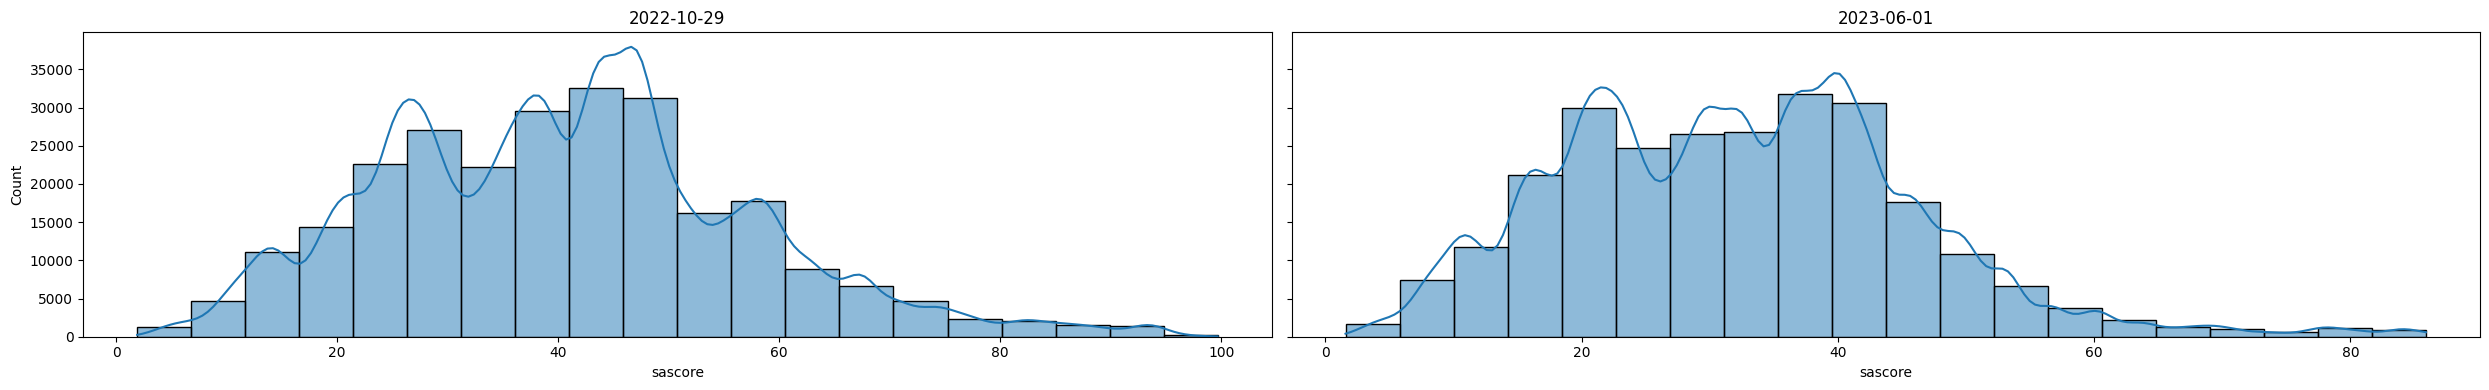

In [60]:
event_dates = df_scores["eventdate"].unique()

fig, axes = plt.subplots(1, len(event_dates), figsize=(25,4), sharey=True)
for idx, event_date in enumerate(event_dates):

    sns.histplot(
        ax = axes[idx], 
        data = df_scores[df_scores["eventdate"]==df_scores["eventdate"].unique()[idx]], 
        x='sascore', 
        bins = 20, 
        kde = True
    );
    
    axes[idx].set_title(event_date)

plt.tight_layout()
print(f"EP Scores for: {S3_PATH.split('/')[4].upper()}")